In [1]:
import numpy as np
import pandas as pd

import bootcamp_utils
import altair as alt

In [2]:
df=pd.read_csv('data/c_elegans_egg_xa.csv',comment='#')
df.head()

,food,area (sq um)
0,high,2061
1,high,1792
2,high,1852
3,high,2091
4,high,1781


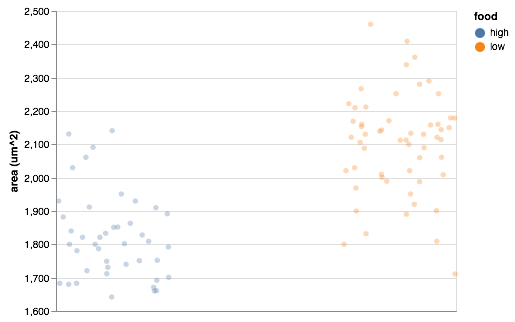

In [5]:
bootcamp_utils.altair_jitter(df,
                             encode_x=alt.X('food:N'),
                             encode_y=alt.Y('area (sq um):Q',                                           
                                           title='area (um^2)',
                                           scale=alt.Scale(zero=False))                             
                                           ).configure_point(filled=True,
                                                        opacity=0.3)


In [11]:
xa_high=df.loc[df['food']=='high','area (sq um)']

In [8]:
type(xa_high)   # single-column DataFrame

pandas.core.series.Series

In [20]:
# convert this to a Numpy array, we use the .values attribute.
xa_high=xa_high.values
type(xa_high)

numpy.ndarray

In [13]:
xa_low = df.loc[df['food']=='low', 'area (sq um)'].values

In [23]:
# Scalars and NumPy arrays
xa_high / 1e6

array([0.002061, 0.001792, 0.001852, 0.002091, 0.001781, 0.001912,
       0.001802, 0.001751, 0.001731, 0.001892, 0.001951, 0.001809,
       0.001683, 0.001787, 0.00184 , 0.001821, 0.00191 , 0.00193 ,
       0.0018  , 0.001833, 0.001683, 0.001671, 0.00168 , 0.001692,
       0.0018  , 0.001821, 0.001882, 0.001642, 0.001749, 0.001712,
       0.001661, 0.001701, 0.002141, 0.001863, 0.001752, 0.00174 ,
       0.001721, 0.00166 , 0.00193 , 0.00203 , 0.001851, 0.002131,
       0.001828])

In [24]:
xa_high + 1000

array([3061, 2792, 2852, 3091, 2781, 2912, 2802, 2751, 2731, 2892, 2951,
       2809, 2683, 2787, 2840, 2821, 2910, 2930, 2800, 2833, 2683, 2671,
       2680, 2692, 2800, 2821, 2882, 2642, 2749, 2712, 2661, 2701, 3141,
       2863, 2752, 2740, 2721, 2660, 2930, 3030, 2851, 3131, 2828])

In [25]:
xa_high < 2000

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True])

In [26]:
if xa_high > 2000:
    print('Nothing to print, really.  This will just be an error.')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
# Check if any values are biggern than 2000
(xa_high > 2000).any()

True

In [28]:
(xa_high > 2000).all()

False

In [29]:
# never use the equality operator (==) with floats
# Compare two numbers
np.isclose(1.3, 1.29999999999)

True

In [30]:
# Compare an array to a scalar
np.isclose(xa_high, 1800)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [31]:
np.allclose(xa_high, 1800)

False

In [33]:
# Operators with two NumPy arrays
xa_high + xa_low

ValueError: operands could not be broadcast together with shapes (43,) (56,) 

In [34]:
# Just take the first elements
xa_low_slice = xa_low[:len(xa_high)]

In [35]:
xa_high + xa_low_slice

array([4151, 3961, 3840, 4303, 4120, 3901, 3946, 4041, 3651, 4172, 3760,
       3967, 3483, 3920, 3900, 3981, 3911, 3960, 3888, 3784, 4143, 3692,
       3690, 3831, 3960, 3927, 4053, 3755, 3928, 3602, 3840, 3722, 4110,
       4013, 3652, 4007, 3432, 3561, 4044, 4142, 4212, 4261, 3889])

In [36]:
np.isclose(xa_high, xa_low_slice)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [37]:
## Slicing NumPy arrays
# Reversed array
xa_high[::-1]

array([1828, 2131, 1851, 2030, 1930, 1660, 1721, 1740, 1752, 1863, 2141,
       1701, 1661, 1712, 1749, 1642, 1882, 1821, 1800, 1692, 1680, 1671,
       1683, 1833, 1800, 1930, 1910, 1821, 1840, 1787, 1683, 1809, 1951,
       1892, 1731, 1751, 1802, 1912, 1781, 2091, 1852, 1792, 2061])

In [38]:
# Every 5th element, starting at index 3
xa_high[3::5]

array([2091, 1731, 1787, 1800, 1692, 1749, 1863, 1930])

In [39]:
# Fancy indexing
xa_high[[1, 19, 6]]

array([1792, 1833, 1802])

In [40]:
#Instead of a list, we could also use a NumPy array.
xa_high[np.array([1, 19, 6])]

array([1792, 1833, 1802])

In [41]:
#Boolean indexing 
xa_high[xa_high > 2000]

array([2061, 2091, 2141, 2030, 2131])

In [42]:
np.where(xa_high > 2000)

(array([ 0,  3, 32, 39, 41]),)

In [43]:
# NumPy arrays are mutable
# Make an array
my_ar = np.array([1, 2, 3, 4])

# Change an element
my_ar[2] = 6

my_ar

array([1, 2, 6, 4])

In [44]:
#Let's see how messing with NumPy in functions affects things.

# Re-instantiate my_ar
my_ar = np.array([1, 2, 3, 4]).astype(float)

# Function to normalize x (note that /= works with mutable objects)
def normalize(x):
    x /= np.sum(x)

# Pass it through a function
normalize(my_ar)

# Is it normalized even though we didn't return anything? (Yes.)
my_ar

array([0.1, 0.2, 0.3, 0.4])

In [45]:
## !!! Slices of NumPy arrays are views, not copies !!!

# Make list and array
my_list = [1, 2, 3, 4]
my_ar = np.array(my_list)

# Slice out of each
my_list_slice = my_list[1:-1]
my_ar_slice = my_ar[1:-1]

# Mess with the slices
my_list_slice[0] = 9
my_ar_slice[0] = 9

# Look at originals
print(my_list)
print(my_ar)

[1, 2, 3, 4]
[1 9 3 4]


In [46]:
#Fortunately, you can make a copy of an array using the np.copy() function.

# Make a copy
xa_high_copy = np.copy(xa_high)

# Mess with an entry
xa_high_copy[10] = 2000

# Check equality
np.allclose(xa_high, xa_high_copy)

False

In [47]:
## Indexing 2D NumPy arrays
my_ar = xa_low.reshape((11, 4))

my_ar

ValueError: cannot reshape array of size 43 into shape (11,4)

In [ ]:
list_of_lists[0,1]

In [ ]:
# Make list of lists
list_of_lists = [[1, 2], [3, 4]]

# Pull out value in first row, second column
# list_of_lists[0][1]
list_of_lists[0,1]